# PyTorch. Основы: синтаксис, torch.cuda и torch.autograd

## Задание 7.1

In [ ]:
import torch
import matplotlib.pyplot as plt

### Задача 1

1). Создайте два вещественных тензора: `a` размером (3, 4) и `b` размером (12,)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (2, 2, 3)  
3). Выведите первый столбец матрицы `a` с помощью индексации

In [ ]:
a = torch.rand((3, 4))
b = torch.rand(12)

print(a)
print(b)

tensor([[0.5256, 0.3991, 0.3865, 0.3637],
        [0.2019, 0.5083, 0.1036, 0.8715],
        [0.3537, 0.0748, 0.1898, 0.3732]])
tensor([0.9906, 0.5454, 0.7304, 0.4152, 0.3311, 0.8779, 0.3578, 0.2575, 0.1706,
        0.0683, 0.5466, 0.7288])


In [ ]:
c = b.view(2, 2, 3)
print(c)

tensor([[[0.9906, 0.5454, 0.7304],
         [0.4152, 0.3311, 0.8779]],

        [[0.3578, 0.2575, 0.1706],
         [0.0683, 0.5466, 0.7288]]])


In [ ]:
result=a[:,0]
print(result)

tensor([0.5256, 0.2019, 0.3537])


### Задача 2

1). Создайте два вещественных тензора: `a` размером (5, 2) и `b` размером (1,10)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (5, 2)  
3). Произведите все арифметические операции с тензорами `a` и `c`

In [ ]:
a = torch.rand((5, 2))
b = torch.rand(1,10)

print(a)
print(b)

tensor([[0.0162, 0.2741],
        [0.2435, 0.3828],
        [0.1051, 0.8874],
        [0.1144, 0.6959],
        [0.7942, 0.9711]])
tensor([[0.8010, 0.7834, 0.3245, 0.3982, 0.7617, 0.7496, 0.0730, 0.4463, 0.4820,
         0.2302]])


In [ ]:
c=b.view(5,2)
print(c)

tensor([[0.8010, 0.7834],
        [0.3245, 0.3982],
        [0.7617, 0.7496],
        [0.0730, 0.4463],
        [0.4820, 0.2302]])


In [ ]:
print(a.add(c))
print(a.sub(c))
print(a.mul(c))
print(a.div(c))

tensor([[0.8173, 1.0574],
        [0.5680, 0.7810],
        [0.8668, 1.6369],
        [0.1874, 1.1422],
        [1.2762, 1.2013]])
tensor([[-0.7848, -0.5093],
        [-0.0809, -0.0154],
        [-0.6567,  0.1378],
        [ 0.0414,  0.2496],
        [ 0.3121,  0.7409]])
tensor([[0.0130, 0.2147],
        [0.0790, 0.1524],
        [0.0800, 0.6651],
        [0.0083, 0.3106],
        [0.3828, 0.2235]])
tensor([[0.0203, 0.3498],
        [0.7505, 0.9613],
        [0.1379, 1.1838],
        [1.5664, 1.5593],
        [1.6476, 4.2189]])


### Задача 3

1). Создайте тензор *целых чисел* `images` размерности (100, 200, 200, 3) (можно интерпретировать это как 100 картинок размера 200х200 с тремя цветовыми каналами, то есть 100 цветных изображений 200х200). Заполните его нулями  

2). Сделайте так, чтобы у $i$-ой по порядку картинки была нарисована белая полоса толщиной два пикселя в строках, которые соответствуют номеру картинки. Например, у 3-ей по порядку картинки белая полоска будет занимать 6 и 7 строки, у 99 - 198 и 199. Сделать белую строку можно, записав в ячейки тензора число 255 (по всем трём каналам). Выведите несколько примеров с помощью `pylot`  

3). Посчитайте среднее тензора `images` по 1-ой оси (по сути - средняя картинка), умножьте полученный тензор на 70. Нарисуйте с помощью `pyplot`, должна получиться серая картинка (при взятии среднего нужно привести тензор к float с помощью `.float()`, при отрисовке обратно к int с помощью `.int()`)

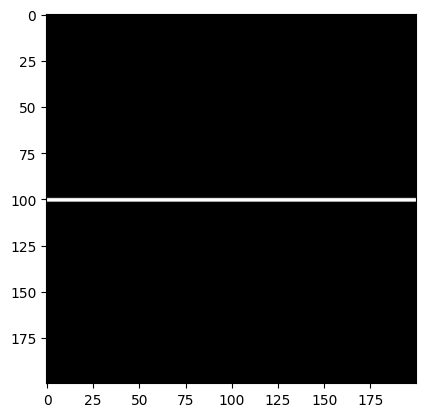

In [ ]:
images = torch.IntTensor(100, 200, 200, 3).zero_()

for i in range(100):
  images[i][2*i:2*i+2] = 255
plt.imshow(images[50])

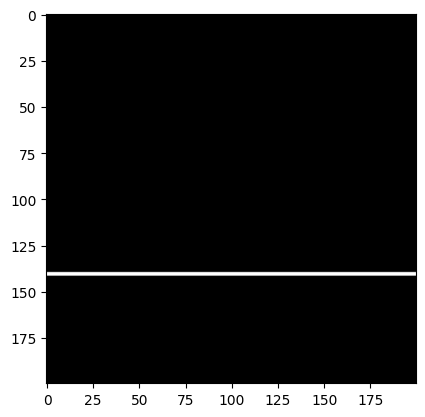

In [ ]:
plt.imshow(images[70])

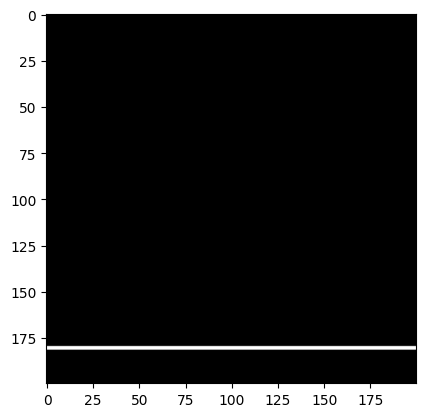

In [ ]:
plt.imshow(images[90])

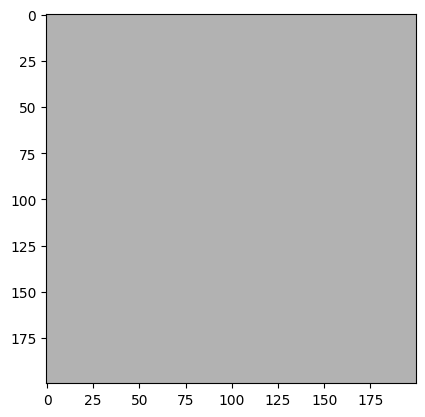

In [ ]:
mean_image = torch.mean(images.float(), 0)
result_image = mean_image * 70
plt.imshow(result_image.int())

### Задача 4

- В Colab нажмите в меню сверху: `Runtime` -> `Change Runtime Type` -> `GPU`, где изначально стоит `None` (`Среда выполнение` - `Сменить среду выполнения`)
- Объявите тензор `a` размера (2, 3, 4) и тензор `b` размера (1, 8, 3) на GPU, иницилизируйте их случайно равномерно (`.uniform_()`)
- Затем измените форму тензора `b`, чтобы она совпадала с формой тензора `a`, получите тензор `c`  
- Переместите `c` на CPU, переместите `a` на CPU  
- Оберните их в `Variable()`
- Объявите тензор `L = torch.mean((c - a) `**` 2)` и посчитайте градиент `L` по `c` ( то есть $\frac{\partial{L}}{\partial{c}})$
- Выведите градиент `L` по `c`

In [ ]:
a = torch.rand(2, 3, 4).uniform_().cuda()
b = torch.rand(1, 8, 3).uniform_().cuda()
a, b

(tensor([[[0.2312, 0.1325, 0.7046, 0.8475],
          [0.4985, 0.9377, 0.0582, 0.1923],
          [0.8224, 0.1341, 0.0796, 0.1417]],
 
         [[0.1027, 0.2260, 0.4010, 0.2283],
          [0.8403, 0.1124, 0.1191, 0.7504],
          [0.0935, 0.2575, 0.2712, 0.1645]]], device='cuda:0'),
 tensor([[[0.3086, 0.1686, 0.2872],
          [0.1636, 0.7938, 0.6892],
          [0.3927, 0.4148, 0.5820],
          [0.6509, 0.8948, 0.1546],
          [0.1516, 0.0432, 0.8552],
          [0.5855, 0.7089, 0.4186],
          [0.8555, 0.1891, 0.1955],
          [0.0536, 0.1692, 0.2159]]], device='cuda:0'))

In [ ]:
c = b.view(2, 3, 4)
a = a.to('cpu')
c = c.to('cpu')

In [ ]:
a.requires_grad = True
c.requires_grad = True

In [ ]:
L = torch.mean((c - a)**2)
L.backward()
print(c.grad)

tensor([[[ 0.0064,  0.0030, -0.0348, -0.0570],
         [ 0.0246, -0.0207,  0.0279,  0.0185],
         [-0.0200,  0.0431,  0.0679,  0.0011]],

        [[ 0.0041, -0.0152,  0.0379,  0.0298],
         [-0.0110,  0.0255,  0.0614, -0.0468],
         [ 0.0085, -0.0170, -0.0085,  0.0043]]])
